In [1]:
import pandas as pd
pd.set_option('display.max_column', 250)
pd.set_option('display.max_row', 2000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
rcParams['figure.figsize'] = (5, 4)
rcParams['figure.dpi'] = 100

In [66]:
def get_info(df, series_name):
    cols = ["classifications correct (percent)", 
            "Kappa Statistic (percent)", 
            "F1 Score (percent)", 
            "Precision (percent)", 
            "Recall (percent)",
            "Change detected"
           ]

    result = pd.Series([df[cols[0]].mean(),
                         df[cols[1]].mean(),
                         df[cols[2]].mean(),
                         df[cols[3]].mean(),
                         df[cols[4]].mean(),
                         df[cols[5]].sum()], index=cols, name=series_name
                       )
    
    for col in cols[:-1]:
        df[col].plot()
    plt.xlabel('Instances')
    plt.ylabel('Percent')
    plt.xticks([])
    plt.legend(loc=3)
    fig = plt.gcf()
    plt.show()
    
    return result, fig

def get_results(dataset_folder):
    
    cols = ["classifications correct (percent)", 
        "Kappa Statistic (percent)", 
        "F1 Score (percent)", 
        "Precision (percent)", 
        "Recall (percent)",
        "Change detected"
       ]
    
    from os import chdir
    import glob

    dataset= dataset_folder
    path = '/Users/Feranor/Uni.li/Thesis/Thesis/drift_behaviour/moa_outputs/outputs/'+dataset+'/'
    chdir(path)
    files = glob.glob('*.csv')

    results = pd.DataFrame(columns=cols)

    for file in files:
        print(file[:-4].upper()+'\n'+'='*100)
        df = pd.read_csv(path+file)
        result, fig = get_info(df, file[:-4].upper())
        fig.suptitle(file[:-4].upper()+' on '+dataset.title()+' Dataset')
        fig.savefig(file[:-4].upper()+'_'+dataset+'.png', dpi=300)
        print(result)
        results = pd.concat([results, pd.DataFrame(result).transpose()])
    display(results)
    results.to_excel(path+'results.xlsx')

PHT


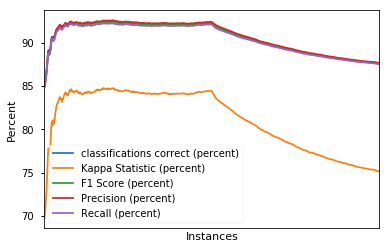

classifications correct (percent)    90.642943
Kappa Statistic (percent)            81.132403
F1 Score (percent)                   90.591684
Precision (percent)                  90.721578
Recall (percent)                     90.462186
Change detected                       1.000000
Name: PHT, dtype: float64
ADWIN


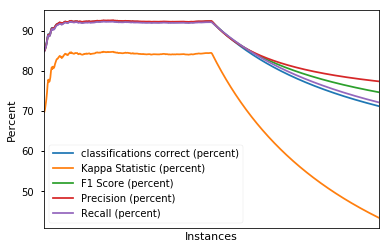

classifications correct (percent)       85.645072
Kappa Statistic (percent)               71.456178
F1 Score (percent)                      86.437809
Precision (percent)                     87.039817
Recall (percent)                        85.860237
Change detected                      24913.000000
Name: ADWIN, dtype: float64
CUSUM


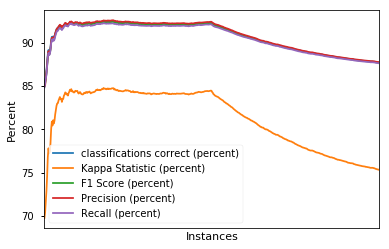

classifications correct (percent)    90.707208
Kappa Statistic (percent)            81.264329
F1 Score (percent)                   90.654596
Precision (percent)                  90.776413
Recall (percent)                     90.533135
Change detected                       1.000000
Name: CUSUM, dtype: float64
RDDM


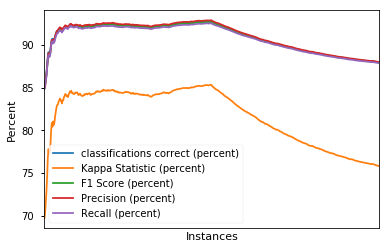

classifications correct (percent)    90.935185
Kappa Statistic (percent)            81.721897
F1 Score (percent)                   90.885246
Precision (percent)                  91.013159
Recall (percent)                     90.757728
Change detected                       5.000000
Name: RDDM, dtype: float64
DDM


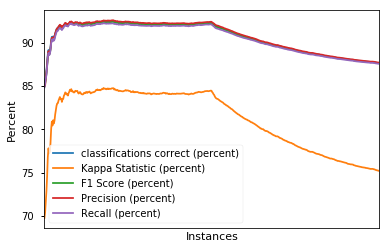

classifications correct (percent)    90.666944
Kappa Statistic (percent)            81.181437
F1 Score (percent)                   90.615310
Precision (percent)                  90.742981
Recall (percent)                     90.488024
Change detected                       1.000000
Name: DDM, dtype: float64
SEQDRIFT2


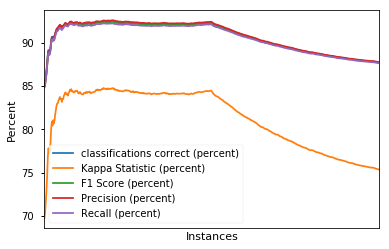

classifications correct (percent)    90.713707
Kappa Statistic (percent)            81.278008
F1 Score (percent)                   90.660785
Precision (percent)                  90.780799
Recall (percent)                     90.541119
Change detected                       1.000000
Name: SEQDRIFT2, dtype: float64
PL


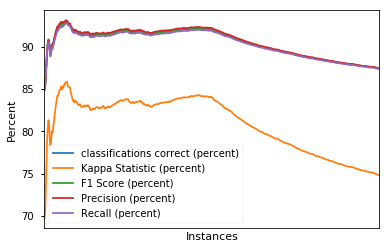

classifications correct (percent)     90.508227
Kappa Statistic (percent)             80.862814
F1 Score (percent)                    90.454022
Precision (percent)                   90.578963
Recall (percent)                      90.329484
Change detected                      155.000000
Name: PL, dtype: float64
EDDM


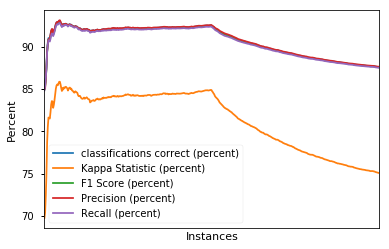

classifications correct (percent)    90.708177
Kappa Statistic (percent)            81.278128
F1 Score (percent)                   90.653269
Precision (percent)                  90.742038
Recall (percent)                     90.564692
Change detected                      21.000000
Name: EDDM, dtype: float64
STEPD


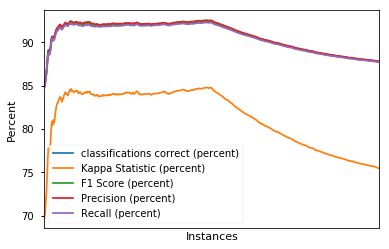

classifications correct (percent)    90.767821
Kappa Statistic (percent)            81.392817
F1 Score (percent)                   90.712068
Precision (percent)                  90.811232
Recall (percent)                     90.613145
Change detected                      15.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,90.642943,81.132403,90.591684,90.721578,90.462186,1.0
ADWIN,85.645072,71.456178,86.437809,87.039817,85.860237,24913.0
CUSUM,90.707208,81.264329,90.654596,90.776413,90.533135,1.0
RDDM,90.935185,81.721897,90.885246,91.013159,90.757728,5.0
DDM,90.666944,81.181437,90.615310,90.742981,90.488024,1.0
SEQDRIFT2,90.713707,81.278008,90.660785,90.780799,90.541119,1.0
PL,90.508227,80.862814,90.454022,90.578963,90.329484,155.0
EDDM,90.708177,81.278128,90.653269,90.742038,90.564692,21.0
STEPD,90.767821,81.392817,90.712068,90.811232,90.613145,15.0


In [67]:
get_results('sine')

PHT


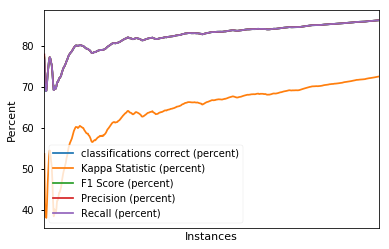

classifications correct (percent)    82.423368
Kappa Statistic (percent)            64.845381
F1 Score (percent)                   82.425201
Precision (percent)                  82.427633
Recall (percent)                     82.422793
Change detected                       7.000000
Name: PHT, dtype: float64
ADWIN


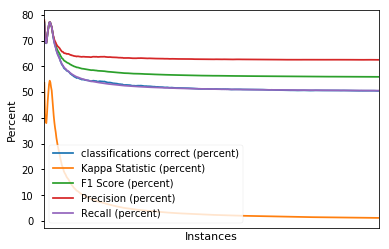

classifications correct (percent)       52.861779
Kappa Statistic (percent)                5.593768
F1 Score (percent)                      57.581405
Precision (percent)                     63.409844
Recall (percent)                        52.793063
Change detected                      48753.000000
Name: ADWIN, dtype: float64
CUSUM


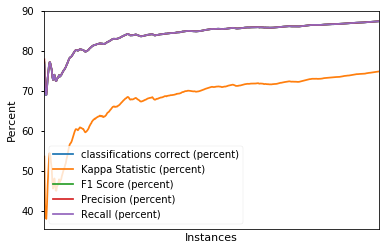

classifications correct (percent)    84.131185
Kappa Statistic (percent)            68.260817
F1 Score (percent)                   84.133279
Precision (percent)                  84.136378
Recall (percent)                     84.130205
Change detected                      10.000000
Name: CUSUM, dtype: float64
RDDM


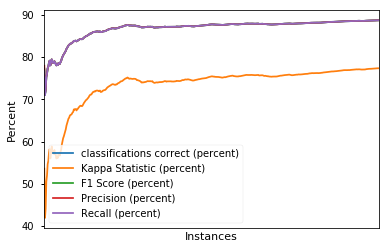

classifications correct (percent)    86.721805
Kappa Statistic (percent)            73.441522
F1 Score (percent)                   86.723060
Precision (percent)                  86.726324
Recall (percent)                     86.719820
Change detected                      26.000000
Name: RDDM, dtype: float64
DDM


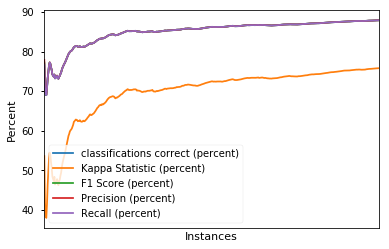

classifications correct (percent)    84.972661
Kappa Statistic (percent)            69.943456
F1 Score (percent)                   84.974740
Precision (percent)                  84.978370
Recall (percent)                     84.971135
Change detected                      20.000000
Name: DDM, dtype: float64
SEQDRIFT2


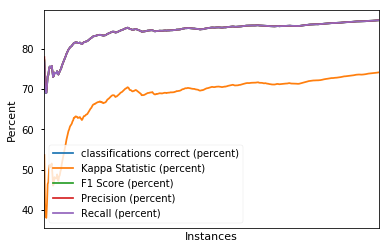

classifications correct (percent)    84.325484
Kappa Statistic (percent)            68.649575
F1 Score (percent)                   84.326928
Precision (percent)                  84.329177
Recall (percent)                     84.324704
Change detected                      19.000000
Name: SEQDRIFT2, dtype: float64
PL


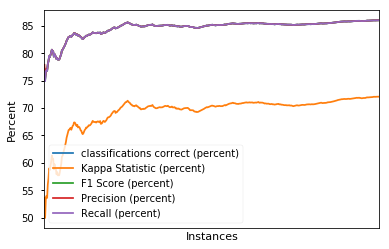

classifications correct (percent)     84.687459
Kappa Statistic (percent)             69.372645
F1 Score (percent)                    84.688788
Precision (percent)                   84.692001
Recall (percent)                      84.685602
Change detected                      237.000000
Name: PL, dtype: float64
EDDM


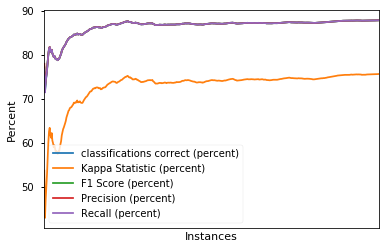

classifications correct (percent)    86.438031
Kappa Statistic (percent)            72.874278
F1 Score (percent)                   86.442446
Precision (percent)                  86.448545
Recall (percent)                     86.436397
Change detected                      62.000000
Name: EDDM, dtype: float64
STEPD


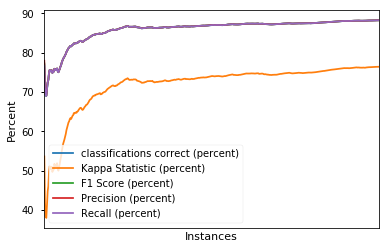

classifications correct (percent)    85.873073
Kappa Statistic (percent)            71.744391
F1 Score (percent)                   85.875878
Precision (percent)                  85.880398
Recall (percent)                     85.871383
Change detected                      26.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,82.423368,64.845381,82.425201,82.427633,82.422793,7.0
ADWIN,52.861779,5.593768,57.581405,63.409844,52.793063,48753.0
CUSUM,84.131185,68.260817,84.133279,84.136378,84.130205,10.0
RDDM,86.721805,73.441522,86.723060,86.726324,86.719820,26.0
DDM,84.972661,69.943456,84.974740,84.978370,84.971135,20.0
SEQDRIFT2,84.325484,68.649575,84.326928,84.329177,84.324704,19.0
PL,84.687459,69.372645,84.688788,84.692001,84.685602,237.0
EDDM,86.438031,72.874278,86.442446,86.448545,86.436397,62.0
STEPD,85.873073,71.744391,85.875878,85.880398,85.871383,26.0


In [68]:
get_results('hyperplane')

PHT


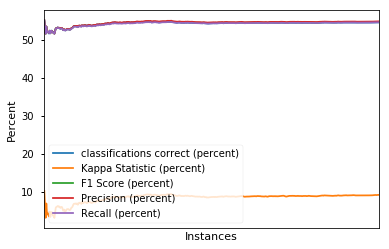

classifications correct (percent)    54.268239
Kappa Statistic (percent)             8.430507
F1 Score (percent)                   54.335658
Precision (percent)                  54.460997
Recall (percent)                     54.210925
Change detected                       0.000000
Name: PHT, dtype: float64
ADWIN


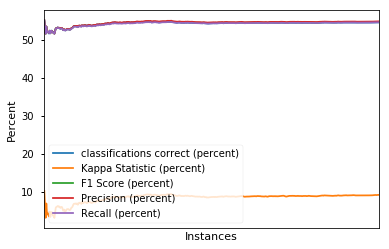

classifications correct (percent)    54.268239
Kappa Statistic (percent)             8.430507
F1 Score (percent)                   54.335658
Precision (percent)                  54.460997
Recall (percent)                     54.210925
Change detected                       0.000000
Name: ADWIN, dtype: float64
CUSUM


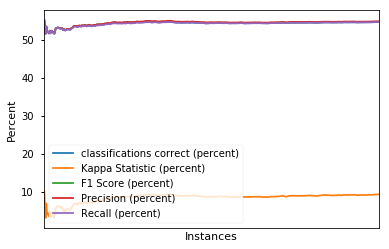

classifications correct (percent)    54.276308
Kappa Statistic (percent)             8.447240
F1 Score (percent)                   54.330670
Precision (percent)                  54.442503
Recall (percent)                     54.219328
Change detected                       1.000000
Name: CUSUM, dtype: float64
RDDM


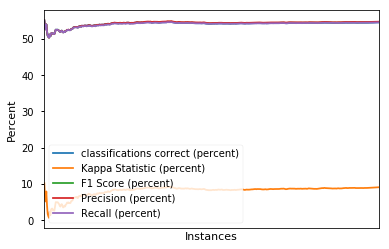

classifications correct (percent)    54.113699
Kappa Statistic (percent)             8.134135
F1 Score (percent)                   54.162022
Precision (percent)                  54.261024
Recall (percent)                     54.063411
Change detected                       4.000000
Name: RDDM, dtype: float64
DDM


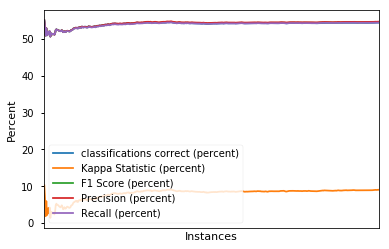

classifications correct (percent)    54.069600
Kappa Statistic (percent)             8.040985
F1 Score (percent)                   54.126491
Precision (percent)                  54.236670
Recall (percent)                     54.016795
Change detected                       1.000000
Name: DDM, dtype: float64
SEQDRIFT2


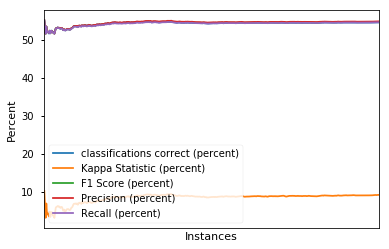

classifications correct (percent)    54.268239
Kappa Statistic (percent)             8.430507
F1 Score (percent)                   54.335658
Precision (percent)                  54.460997
Recall (percent)                     54.210925
Change detected                       0.000000
Name: SEQDRIFT2, dtype: float64
PL


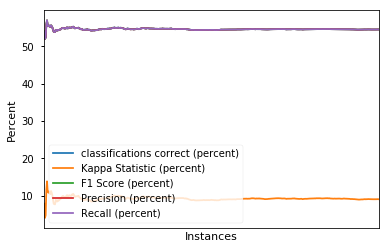

classifications correct (percent)      54.620771
Kappa Statistic (percent)               9.216157
F1 Score (percent)                     54.610544
Precision (percent)                    54.613961
Recall (percent)                       54.607128
Change detected                      1740.000000
Name: PL, dtype: float64
EDDM


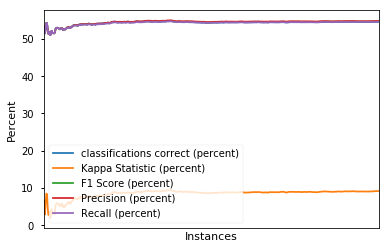

classifications correct (percent)    54.280533
Kappa Statistic (percent)             8.473274
F1 Score (percent)                   54.336780
Precision (percent)                  54.441029
Recall (percent)                     54.232964
Change detected                       4.000000
Name: EDDM, dtype: float64
STEPD


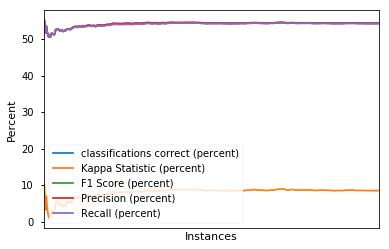

classifications correct (percent)    54.042788
Kappa Statistic (percent)             7.988672
F1 Score (percent)                   54.066498
Precision (percent)                  54.142589
Recall (percent)                     53.990655
Change detected                      22.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,54.268239,8.430507,54.335658,54.460997,54.210925,0.0
ADWIN,54.268239,8.430507,54.335658,54.460997,54.210925,0.0
CUSUM,54.276308,8.447240,54.330670,54.442503,54.219328,1.0
RDDM,54.113699,8.134135,54.162022,54.261024,54.063411,4.0
DDM,54.069600,8.040985,54.126491,54.236670,54.016795,1.0
SEQDRIFT2,54.268239,8.430507,54.335658,54.460997,54.210925,0.0
PL,54.620771,9.216157,54.610544,54.613961,54.607128,1740.0
EDDM,54.280533,8.473274,54.336780,54.441029,54.232964,4.0
STEPD,54.042788,7.988672,54.066498,54.142589,53.990655,22.0


In [71]:
get_results('rbf')

PHT


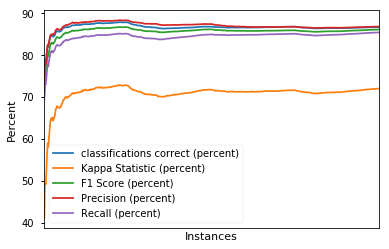

classifications correct (percent)    86.660010
Kappa Statistic (percent)            70.879958
F1 Score (percent)                   85.714124
Precision (percent)                  87.015966
Recall (percent)                     84.454920
Change detected                       2.000000
Name: PHT, dtype: float64
ADWIN


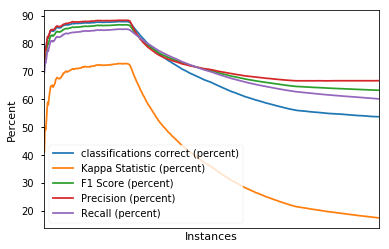

classifications correct (percent)       69.155411
Kappa Statistic (percent)               41.674947
F1 Score (percent)                      73.042765
Precision (percent)                     74.462917
Recall (percent)                        71.713096
Change detected                      37137.000000
Name: ADWIN, dtype: float64
CUSUM


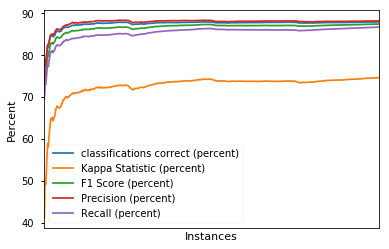

classifications correct (percent)    87.510330
Kappa Statistic (percent)            72.740934
F1 Score (percent)                   86.620708
Precision (percent)                  87.872828
Recall (percent)                     85.407148
Change detected                       3.000000
Name: CUSUM, dtype: float64
RDDM


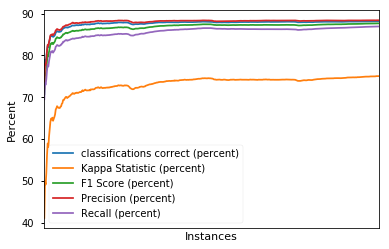

classifications correct (percent)    87.634674
Kappa Statistic (percent)            73.021762
F1 Score (percent)                   86.751912
Precision (percent)                  87.976975
Recall (percent)                     85.564024
Change detected                       3.000000
Name: RDDM, dtype: float64
DDM


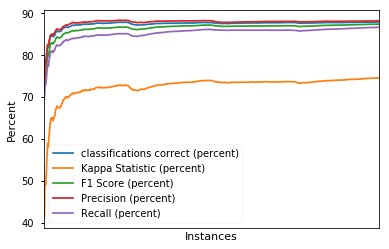

classifications correct (percent)    87.445284
Kappa Statistic (percent)            72.587646
F1 Score (percent)                   86.552943
Precision (percent)                  87.830431
Recall (percent)                     85.315451
Change detected                       4.000000
Name: DDM, dtype: float64
SEQDRIFT2


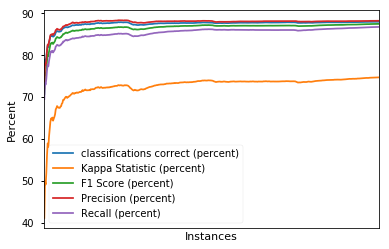

classifications correct (percent)    87.475279
Kappa Statistic (percent)            72.660332
F1 Score (percent)                   86.583291
Precision (percent)                  87.843191
Recall (percent)                     85.362488
Change detected                       4.000000
Name: SEQDRIFT2, dtype: float64
PL


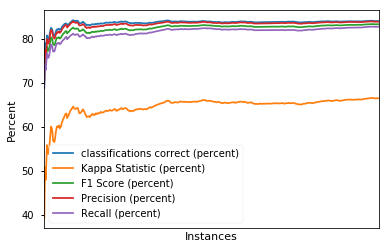

classifications correct (percent)     83.691310
Kappa Statistic (percent)             64.594417
F1 Score (percent)                    82.451614
Precision (percent)                   83.343643
Recall (percent)                      81.580101
Change detected                      178.000000
Name: PL, dtype: float64
EDDM


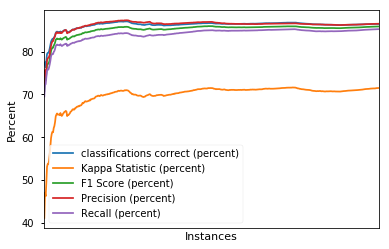

classifications correct (percent)    86.121698
Kappa Statistic (percent)            69.794776
F1 Score (percent)                   85.100169
Precision (percent)                  86.178066
Recall (percent)                     84.051966
Change detected                      27.000000
Name: EDDM, dtype: float64
STEPD


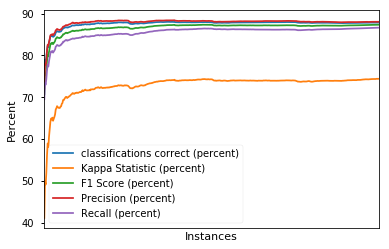

classifications correct (percent)    87.548137
Kappa Statistic (percent)            72.845161
F1 Score (percent)                   86.658402
Precision (percent)                  87.865902
Recall (percent)                     85.487334
Change detected                       8.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,86.660010,70.879958,85.714124,87.015966,84.454920,2.0
ADWIN,69.155411,41.674947,73.042765,74.462917,71.713096,37137.0
CUSUM,87.510330,72.740934,86.620708,87.872828,85.407148,3.0
RDDM,87.634674,73.021762,86.751912,87.976975,85.564024,3.0
DDM,87.445284,72.587646,86.552943,87.830431,85.315451,4.0
SEQDRIFT2,87.475279,72.660332,86.583291,87.843191,85.362488,4.0
PL,83.691310,64.594417,82.451614,83.343643,81.580101,178.0
EDDM,86.121698,69.794776,85.100169,86.178066,84.051966,27.0
STEPD,87.548137,72.845161,86.658402,87.865902,85.487334,8.0


In [72]:
get_results('sea')

In [73]:
get_results('elec')

PHT


TypeError: Could not convert 90.085.583.082.580.8000000000000180.1666666666666680.080.7581.2222222222222182.382.5454545454545582.0833333333333381.1538461538461681.2142857142857281.3999999999999980.7580.4117647058823580.580.4210526315789580.981.3333333333333380.7727272727272878.9565217391304479.6666666666666679.1679.7307692307692379.5185185185185279.579.5862068965517380.1333333333333480.096774193548480.0937580.090909090909180.580.7142857142857281.1666666666666781.297297297297381.2631578947368481.4358974358974381.3581.3902439024390281.5238095238095281.4883720930232681.2272727272727281.5777777777777881.630434782608781.8297872340425682.0833333333333382.1632653061224481.9481.8235294117647181.9807692307692481.8490566037735981.296296296296381.3272727272727381.4107142857142881.4736842105263281.3275862068965681.5423728813559381.3999999999999981.5901639344262381.7419354838709681.7301587301587381.57812581.7538461538461581.6515151515151681.4328358208955281.6764705882352981.753623188405881.5142857142857281.4366197183098681.3333333333333381.1780821917808281.2837837837837881.4266666666666881.4342105263157881.5454545454545581.4743589743589881.6202531645569781.6581.7901234567901381.9146341463414682.084337349397682.0833333333333382.0235294117647182.0232558139534882.1724137931034482.215909090909182.3483146067415782.3555555555555582.3846153846153982.5326086956521782.2903225806451582.3297872340425682.2210526315789682.3333333333333482.1752577319587782.2551020408163382.3232323232323282.3982.5247524752475282.5392156862745282.5242718446601982.5769230769230882.5333333333333382.5660377358490582.6074766355140282.5185185185185282.5321100917431282.5545454545454682.5855855855855982.5357142857142982.4601769911504582.4122807017543882.4434782608695782.3793103448275982.401709401709482.3220338983050882.310924369747982.2916666666666682.2231404958677782.2131147540983681.8861788617886281.9032258064516281.9281.706349206349281.6220472440944981.648437581.7054263565891681.7384615384615481.7709923664122281.8106060606060681.8195488721804581.873134328358281.7407407407407381.7426470588235281.7883211678832181.8115942028985581.8057553956834581.7928571428571481.7375886524822781.5774647887323981.5734265734265781.562581.6275862068965581.6506849315068581.7074829931972781.7364864864864881.8053691275167881.8066666666666781.6158940397351181.6118421052631581.6143790849673381.597402597402681.5161290322580681.5064102564102581.3757961783439581.1898734177215181.1572327044025281.1937581.1677018633540481.1851851851851881.1901840490797581.0975609756097781.0303030303030381.042168674698881.0718562874251581.0595238095238181.0946745562130281.1235294117647181.0818713450292481.1279069767441981.1618497109826681.1034482758620680.8971428571428580.7556818181818380.6158192090395680.6011235955056180.6312849162011280.6555555555555580.7127071823204480.6758241758241880.743169398907180.7445652173913180.794594594594680.8440860215053880.9037433155080280.9095744680851180.9259259259259280.957894736842180.7015706806282880.45312580.4507772020725480.4793814432989880.3230769230769380.3622448979591780.3705583756345280.2424242424242480.1658291457286480.280.1194029850746380.0594059405940679.9753694581280779.9852941176470679.921951219512279.8543689320388479.8840579710144979.8413461538461579.7224880382775279.7380952380952479.786729857819979.8396226415094479.8638497652582279.9205607476635479.9720930232558279.907407407407479.8801843317972479.9495412844036779.963470319634780.0272727272727380.0045248868778380.0180180180180380.0717488789237780.1339285714285780.1155555555555579.9380530973451379.9030837004405279.820175438596579.711790393013179.6260869565217379.5238095238095279.4094827586206879.3476394849785479.3803418803418779.3361702127659579.254237288135679.2531645569620379.3025210084033679.1882845188284579.1083333333333379.1203319502074779.1446280991735679.144032921810779.1475409836065679.1183673469387879.060975609756178.9878542510121579.0040322580645178.9437751004016178.9479.0159362549800878.9682539682539678.9446640316205578.8818897637795378.9176470588235278.9687578.9571984435797779.0193798449612478.9343629343629479.079.0651340996168779.0458015267175579.0380228136882279.0871212121212279.086792452830279.0902255639097879.0936329588014979.1567164179104579.1301115241635779.1740740740740779.2029520295202979.1066176470588179.1098901098901279.0328467153284679.0545454545454678.9420289855072578.9819494584837578.8956834532374178.8279569892473178.8321428571428678.8007117437722478.7411347517730578.7137809187279278.721830985915578.7192982456140378.7412587412587578.7665505226480978.6736111111111178.6193771626297678.5517241379310378.580756013745778.5821917808219278.5017064846416478.5544217687074878.5559322033898378.5270270270270378.4747474747474778.4463087248322278.4414715719063578.4566666666666678.4950166112956878.5165562913907378.4455445544554578.4243421052631578.403278688524678.3758169934640678.4201954397394278.3993506493506578.388349514563178.2967741935483978.2572347266881178.2339743589743578.2651757188498578.2006369426751678.278.1170886075949478.1009463722397578.0691823899371178.0407523510971878.03437578.0467289719626277.9937888198757777.9442724458204377.8827160493827277.9015384615384677.8098159509202577.8195718654434277.804878048780577.8449848024316177.8333333333333377.791540785498577.8072289156626577.8618618618618577.8053892215568877.7462686567164277.7113095238095277.6884272997032677.6242603550295877.6843657817109277.6352941176470677.5513196480938477.4561403508771977.5014577259475277.5116279069767477.5246376811594277.5144508670520277.5216138328530377.5143678160919677.4412607449856777.4685714285714477.4957264957264977.497159090909177.490084985835777.4858757062146977.5098591549295777.5196629213483177.5546218487394977.5865921787709677.610027855153277.6083333333333377.6315789473684277.6546961325966877.669421487603377.6236263736263877.5698630136986277.5437158469945377.5258855585831177.5108695652173977.514905149051577.5513513513513477.5902964959568877.5564516129032277.5790884718498777.5935828877005377.5253333333333477.5478723404255377.5676392572944377.5767195767195877.5699208443271777.5526315789473777.5669291338582777.5785340314136177.5874673629242777.5755208333333377.5688311688311777.6165803108808377.6175710594315377.6108247422680477.6246786632390877.6564102564102577.6598465473145977.5637755102040877.5954198473282477.6040609137055877.6303797468354477.6186868686868677.6322418136020177.6683417085427177.7117794486215677.75577.7655860349127277.7835820895522477.8064516129032377.8217821782178377.817283950617377.8497536945812877.7764127764127777.7769607843137277.7921760391198177.8097560975609877.834549878345577.8689320388349477.9128329297820877.9130434782608777.8987951807228977.9182692307692377.9256594724220577.968899521531178.0095465393794777.9928571428571577.9952494061757778.0402843601895778.0591016548463478.0188679245283178.0423529411764778.0492957746478978.0725995316159278.0186915887850578.0419580419580478.0744186046511678.0951276102088278.094907407407478.1016166281755278.0875576036866578.0965517241379278.1169724770642278.0915331807780378.0890410958904178.086560364464778.0727272727272878.0408163265306278.0678733031674278.0835214446952678.0247747747747778.0202247191011278.0381165919282677.9932885906040278.0200892857142978.044543429844178.0444444444444578.0110864745011178.0265486725663878.041942604856578.04334392655367classifications correct (percent)88.083.581.081.075.875.1666666666666774.8571428571428675.87574.888888888888976.377.090909090909175.1666666666666774.692307692307774.2857142857142975.6666666666666776.7577.2941176470588377.7777777777777978.2105263157894877.9578.1904761904761977.7727272727272777.4347826086956678.0416666666666777.5677.577.7037037037037177.3928571428571477.9310344827586278.5333333333333378.2903225806451778.37578.2727272727272778.8235294117647179.079.579.6756756756756879.7631578947368579.8717948717948879.7579.878048780487880.0476190476190580.0465116279069879.8636363636363680.2444444444444480.391304347826180.5957446808510780.87581.040816326530680.8480.607843137254980.7692307692307780.6226415094339680.1666666666666680.480.4642857142857180.6315789473684280.4310344827586280.6440677966101780.580.5573770491803280.6935483870967780.8253968253968280.64062580.8000000000000180.6818181818181780.4776119402985280.7205882352941280.7971014492753680.5285714285714280.5070422535211280.3194444444444480.0684931506849380.1621621621621680.1733333333333380.0394736842105280.0519480519480579.9230769230769280.025316455696279.987580.160493827160580.2926829268292780.4939759036144680.4761904761904880.4705882352941280.6511627906976780.8620689655172480.965909090909181.1348314606741681.1111111111111181.1538461538461681.3152173913043481.0860215053763581.1276595744680881.0736842105263281.2187581.0927835051546481.1326530612244981.2323232323232481.3381.4752475247524881.5098039215686281.5145631067961281.5769230769230881.504761904761981.5471698113207681.6448598130841181.638888888888981.6238532110091881.6363636363636481.603603603603681.5446428571428681.4778761061946981.4736842105263281.4782608695652281.2581.3162393162393281.3305084745762681.310924369747981.3166666666666881.2561983471074381.2868852459016481.1626016260162781.1935483870967781.23281.1507936507936481.1811023622047381.164062581.1395348837209381.1000000000000181.1221374045801681.2121212121212281.2481203007518881.291044776119481.2518518518518581.2794117647058881.3430656934306681.3115942028985581.3381294964028781.3857142857142981.4042553191489381.3450704225352281.3146853146853281.2986111111111181.3448275862068981.4178082191780881.462585034013681.5135135135135281.5436241610738281.4533333333333381.2384105960264881.1578947368421181.1568627450980481.1428571428571481.0645161290322681.0705128205128280.9554140127388680.9683544303797580.987421383647880.9937499999999980.9813664596273280.907407407407480.8466257668711680.7621951219512280.7757575757575880.7349397590361480.7844311377245580.6845238095238180.6449704142011880.6647058823529380.6023391812865580.5813953488372280.4797687861271780.4597701149425380.2880.2045454545454580.2146892655367280.2528089887640480.290502793296180.3555555555555580.3756906077348180.3351648351648580.3934426229508180.4130434782608780.4648648648648680.4731182795698980.5401069518716680.6010638297872480.6455026455026580.7105263157894880.5392670157068180.3385416666666680.3419689119170980.3505154639175380.2615384615384680.2806122448979780.3350253807106680.2525252525252680.185929648241280.1950000000000180.0995024875621980.0495049504950580.0492610837438480.0833333333333380.0390243902439180.0145631067961279.9806763285024379.9807692307692379.875598086124479.8380952380952479.9052132701421879.8915094339622679.8873239436619779.9299065420560779.9767441860465279.9305555555555679.8894009216589879.9495412844036779.9178082191780779.9772727272727379.9638009049773879.9774774774774880.0089686098654880.0535714285714380.0355555555555679.9380530973451379.898678414096979.8114035087719379.711790393013179.6260869565217379.5238095238095279.4310344827586279.4763948497854179.4957264957264979.4425531914893779.3983050847457679.4008438818565579.4495798319327779.4142259414225979.2541666666666679.2738589211618279.289256198347179.279835390946579.282786885245979.253061224489879.186991869918779.1012145748987879.12579.084337349397679.0760000000000179.0836653386454278.9960317460317578.980237154150278.9566929133858278.9803921568627579.0351562579.0155642023346379.0658914728682278.9884169884169979.0115384615384679.0574712643678279.0267175572519179.0304182509505879.071969696969779.075471698113279.0676691729323379.056179775280979.0932835820895579.0743494423791779.1259259259259379.1881918819188379.0735294117647179.0549450549450578.9817518248175179.0036363636363678.9130434782608778.9566787003610178.8741007194244678.8064516129032378.8107142857142878.7971530249110478.8156028368794478.8127208480565478.8239436619718278.828070175438678.8566433566433578.8919860627177678.7986111111111178.743944636678278.7793103448275978.7938144329896978.7671232876712478.7167235494880578.7142857142857178.705084745762778.6418918918918978.6296296296296378.647651006711478.6287625418060378.6566666666666778.6644518272425278.6324503311258278.5610561056105678.5361842105263278.4852459016393578.4379084967320278.4918566775244278.5097402597402578.524271844660278.4193548387096878.3954983922829678.4038461538461678.418530351437778.3121019108280278.3174603174603278.2531645569620378.2239747634069478.1981132075471778.169278996865278.0937578.1152647975077978.0621118012422478.012383900928877.9598765432098777.9538461538461677.8711656441717877.8501529051987877.8292682926829377.8541033434650477.8393939393939477.7945619335347577.8042168674698877.8528528528528577.7664670658682677.704477611940377.6577380952380977.6439169139465877.5798816568047477.640117994100377.6088235294117777.5102639296187777.4502923976608277.4868804664723177.4854651162790777.4811594202898677.4132947976878577.3948126801152877.3764367816091977.3295128939828177.3677.407407407407477.4204545454545577.4447592067988677.4717514124293877.4929577464788877.5028089887640477.5322128851540777.5530726256983277.5738161559888777.5861111111111177.6094182825484877.6298342541436577.6418732782369177.5961538461538577.5424657534246677.5191256830601177.4959128065395177.4755434782608677.4796747967479777.5162162162162277.5471698113207677.5161290322580677.5308310991957177.5347593582887777.4877.4973404255319277.5225464190981577.5291005291005377.5277044854881377.4894736842105477.5039370078740177.513089005235677.506527415143677.45312577.4441558441558477.4689119170984577.4496124031007777.4561855670103177.4704370179948577.505128205128277.5115089514066577.4566326530612277.4656488549618377.4593908629441677.4531645569620277.4595959595959677.4458438287153777.4522613065326677.4912280701754477.5225000000000177.5261845386533777.5323383084577177.5508684863523677.561881188118877.5827160493827177.6133004926108377.601965601965677.5882352941176577.5965770171149177.6170731707317177.6399026763990377.6699029126213577.7118644067796777.7125603864734377.698795180722977.7187577.733812949640377.7583732057416277.7923627684964277.7785714285714277.7838479809976277.8317535545023777.858156028368877.8301886792452877.8447058823529477.8427230046948377.868852459016477.7990654205607477.8298368298368477.8604651162790677.867749419953677.8356481481481577.8290993071593577.7995391705069277.7954022988505877.772935779816577.7665903890160277.7214611872146277.7220956719817877.7204545454545477.678004535147477.6945701357466277.7178329571106277.646396396396477.6764044943820377.7040358744394677.6621923937360277.6651785714285777.6881959910913277.6977777777777777.6541019955654177.6836283185840777.6909492273730777.69244350282486 to numeric